<a href="https://colab.research.google.com/github/Skriller18/Model_Comparisons/blob/main/Effecient_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##EFFECIENT NET WORKING
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

def efficient_net_b0(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input image size and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Data paths
train_data_dir = '/content/drive/MyDrive/cropweed1/train'
validation_data_dir = '/content/drive/MyDrive/cropweed1/test'

# Hyperparameters
batch_size = 32
epochs = 10

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create the model
model_1 = efficient_net_b0(input_shape, num_classes)

# Compile the model
model_1.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Found 320 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 176s 17s/step - loss: 0.6978 - accuracy: 0.5750 - val_loss: 0.6650 - val_accuracy: 0.6951
Epoch 2/10
10/10 [==============================] - 159s 16s/step - loss: 0.5462 - accuracy: 0.7406 - val_loss: 0.5643 - val_accuracy: 0.7317
Epoch 3/10
10/10 [==============================] - 153s 16s/step - loss: 0.4873 - accuracy: 0.7719 - val_loss: 0.5526 - val_accuracy: 0.7561
Epoch 4/10
10/10 [==============================] - 149s 15s/step - loss: 0.3813 - accuracy: 0.8031 - val_loss: 0.5089 - val_accuracy: 0.7561
Epoch 5/10
10/10 [==============================] - 148s 15s/step - loss: 0.3298 - accuracy: 0.8031 - val_loss: 0.8800 - val_accuracy: 0.8659
Epoch 6/10
10/10 [==============================] - 150s 15s/step - loss: 0.2997 - accuracy: 0.9031 - val_loss: 0.7468 - val_accuracy: 0.9146
Epoch 7/10
10/10 [==============================] - 158s 16s/step -

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input image size and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Data paths
train_data_dir = '/content/drive/MyDrive/cropweed2/train'
validation_data_dir = '/content/drive/MyDrive/cropweed2/test'

# Hyperparameters
batch_size = 32
epochs = 10

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator_mask = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator_mask = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create the model
model_2 = efficient_net_b0(input_shape, num_classes)

# Compile the model
model_2.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(
    train_generator_mask,
    epochs=epochs,
    validation_data=validation_generator_mask
)


Found 320 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 346s 35s/step - loss: 0.6522 - accuracy: 0.6469 - val_loss: 0.3314 - val_accuracy: 0.8659
Epoch 2/10
10/10 [==============================] - 102s 10s/step - loss: 0.3874 - accuracy: 0.8406 - val_loss: 0.3124 - val_accuracy: 0.8415
Epoch 3/10
10/10 [==============================] - 104s 11s/step - loss: 0.3038 - accuracy: 0.8844 - val_loss: 0.2866 - val_accuracy: 0.8902
Epoch 4/10
10/10 [==============================] - 100s 10s/step - loss: 0.2704 - accuracy: 0.8813 - val_loss: 0.2535 - val_accuracy: 0.8902
Epoch 5/10
10/10 [==============================] - 102s 10s/step - loss: 0.2286 - accuracy: 0.9031 - val_loss: 0.3280 - val_accuracy: 0.8537
Epoch 6/10
10/10 [==============================] - 101s 10s/step - loss: 0.2167 - accuracy: 0.8969 - val_loss: 0.2468 - val_accuracy: 0.8659
Epoch 7/10
10/10 [==============================] - 102s 10s/step -

In [7]:
#Plotting our loss curves
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="Validation_loss")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.ylabel("Losses")
  plt.legend()

  #Plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="Validation_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()


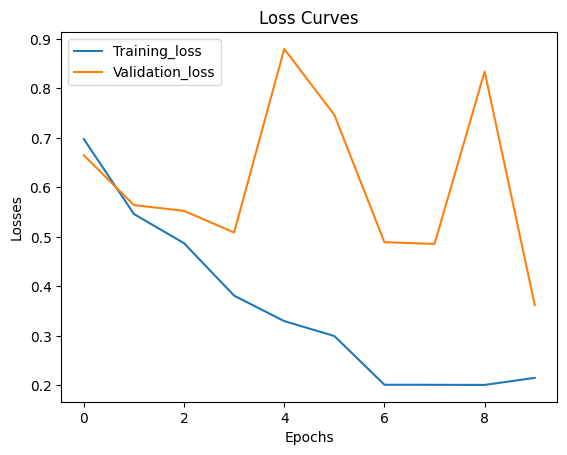

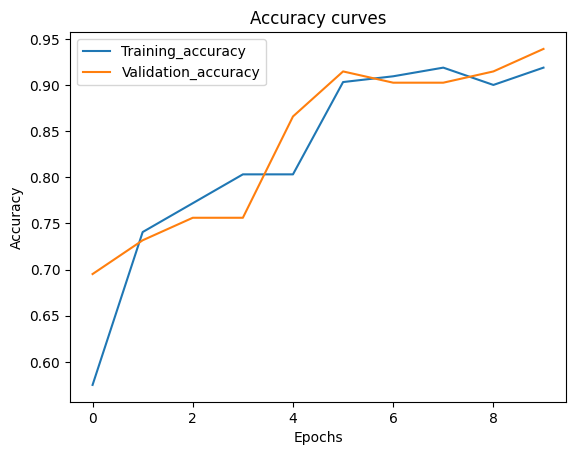

In [5]:
plot_loss_curves(history_1)

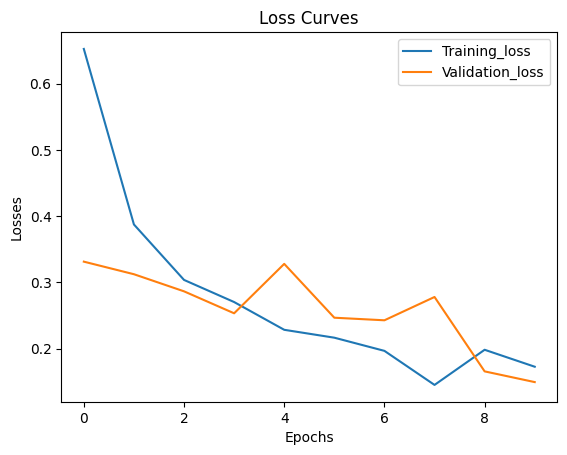

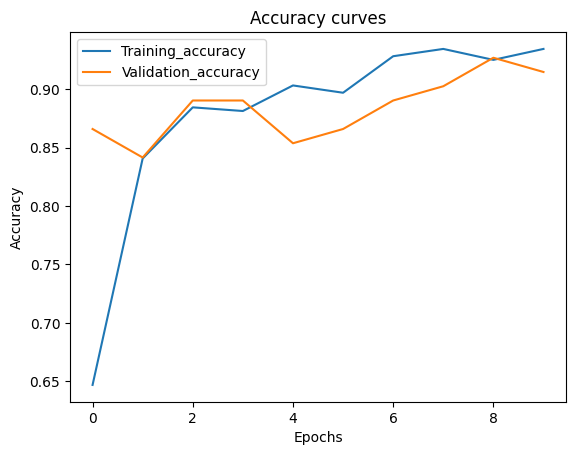

In [6]:
plot_loss_curves(history_2)